# Introduction
This notebook compares the performance of Artificial Neural Networks (ANNs) and Convolutional Neural Networks (CNNs) on the CIFAR-10 image classification task. While ANNs achieved a weighted average F1-score of 0.46 on a test set of 10,000 images, CNNs demonstrated superior performance with a weighted average F1-score of 0.70. This significant improvement highlights the advantages of CNNs in capturing spatial hierarchies and local patterns within image data, which ANNs struggle to extract effectively.



# Importing Libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt # used to plot images from dataset
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report

# Load the dataset

 CIFAR-10 Dataset

**CIFAR-10** is a widely used benchmark dataset in computer vision for object recognition tasks. It consists of **60,000** color images, each with a size of **32x32 pixels**. These images are divided into **10** classes, with **6,000** images per class. 

* **Classes:** Airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. 
* **Data Split:** The dataset is divided into a training set of 50,000 images and a testing set of 10,000 images.

CIFAR-10 is a valuable resource for researchers and practitioners to experiment with various image classification algorithms and assess their performance. Due to its relatively small size and well-defined classes, it is a popular choice for rapid prototyping and testing of different models.
 

In [2]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

### Here we see there are 50000 training images and 1000 test images

In [5]:
y_train.shape

(50000, 1)

In [6]:
print(y_train[:5]) # y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

[[6]
 [9]
 [9]
 [4]
 [1]]


In [7]:
y_train = y_train.reshape(-1,)
y_train.shape # now it is a single dimension array instead of 2d-array

(50000,)

In [8]:
print(y_train[:5])

[6 9 9 4 1]


In [9]:
y_test = y_test.reshape(-1,) # doing same reshaping for y_test

# Plotting Images with Matplotlib

In [10]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
# defining class as variable to get images names parrel to below function

In [11]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index]) # matplot lib function to display array as an image
    plt.xlabel(classes[y[index]])

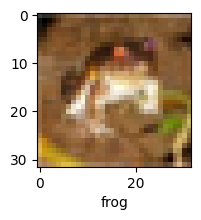

In [12]:
plot_sample(X_train, y_train, 0)

# Image Normalization

In [13]:
X_train = X_train / 255.0
X_test = X_test / 255.0

# Building ANN(artifical neural network) for classification 

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [15]:
ann_history=ann.fit(X_train, y_train, epochs=5)

Epoch 1/5


1563/1563 [==============================] - 91s 58ms/step - loss: 1.8126 - accuracy: 0.3516
Epoch 2/5
1563/1563 [==============================] - 92s 59ms/step - loss: 1.6233 - accuracy: 0.4279
Epoch 3/5
1563/1563 [==============================] - 93s 59ms/step - loss: 1.5415 - accuracy: 0.4556
Epoch 4/5
1563/1563 [==============================] - 90s 57ms/step - loss: 1.4758 - accuracy: 0.4782
Epoch 5/5
1563/1563 [==============================] - 87s 56ms/step - loss: 1.4283 - accuracy: 0.4989


In [16]:
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 10ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.47      0.65      0.54      1000
           1       0.62      0.60      0.61      1000
           2       0.26      0.56      0.36      1000
           3       0.41      0.27      0.32      1000
           4       0.35      0.39      0.37      1000
           5       0.58      0.19      0.28      1000
           6       0.47      0.57      0.52      1000
           7       0.67      0.39      0.49      1000
           8       0.65      0.55      0.60      1000
           9       0.61      0.49      0.54      1000

    accuracy                           0.46     10000
   macro avg       0.51      0.46      0.46     10000
weighted avg       0.51      0.46      0.46     10000



# Building CNN for Image Classification

In [17]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [18]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', #
              metrics=['accuracy'])

In [19]:
cnn_history=cnn.fit(X_train, y_train, epochs=5)

Epoch 1/5
1563/1563 [==============================] - 19s 11ms/step - loss: 1.4481 - accuracy: 0.4819
Epoch 2/5
1563/1563 [==============================] - 17s 11ms/step - loss: 1.1068 - accuracy: 0.6148
Epoch 3/5
1563/1563 [==============================] - 18s 11ms/step - loss: 0.9808 - accuracy: 0.6576
Epoch 4/5
1563/1563 [==============================] - 20s 13ms/step - loss: 0.8994 - accuracy: 0.6878
Epoch 5/5
1563/1563 [==============================] - 19s 12ms/step - loss: 0.8310 - accuracy: 0.7090


In [20]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.9050 - accuracy: 0.6937


[0.9050402641296387, 0.6937000155448914]

In [21]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 4ms/step


array([[1.14220486e-03, 1.47972707e-04, 4.57582399e-02, 8.55444610e-01,
        1.83274259e-03, 2.85229888e-02, 6.28151838e-03, 1.53131099e-04,
        6.06451742e-02, 7.13218687e-05],
       [1.39200045e-02, 3.32108974e-01, 1.64402391e-05, 7.77367404e-06,
        3.48718601e-07, 7.48727416e-07, 2.93625334e-07, 2.67796099e-06,
        6.53384447e-01, 5.58320549e-04],
       [7.44437799e-02, 3.98162365e-01, 4.56341263e-03, 3.94483693e-02,
        2.32131663e-03, 8.29364080e-03, 4.04122472e-03, 4.34346311e-03,
        4.16320562e-01, 4.80618291e-02],
       [8.35688472e-01, 9.32762492e-03, 2.11833473e-02, 2.25459714e-03,
        3.11879888e-02, 2.53701059e-04, 2.27523455e-03, 7.44083023e-04,
        9.45113823e-02, 2.57357745e-03],
       [2.10721500e-05, 1.36947594e-04, 1.06123788e-02, 4.26519662e-02,
        7.59603441e-01, 1.52108567e-02, 1.71688139e-01, 1.90415685e-05,
        3.50298906e-05, 2.10916114e-05]], dtype=float32)

In [22]:
y_pred = cnn.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print(y_pred_classes[:5])

313/313 [==============================] - 1s 4ms/step
[3, 8, 8, 0, 4]


In [23]:
print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.71      0.78      0.74      1000
           1       0.83      0.79      0.81      1000
           2       0.59      0.57      0.58      1000
           3       0.46      0.60      0.52      1000
           4       0.63      0.62      0.62      1000
           5       0.65      0.53      0.58      1000
           6       0.75      0.78      0.77      1000
           7       0.75      0.76      0.75      1000
           8       0.82      0.79      0.80      1000
           9       0.82      0.73      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.70     10000
weighted avg       0.70      0.69      0.70     10000



# Model Comparision by Graph

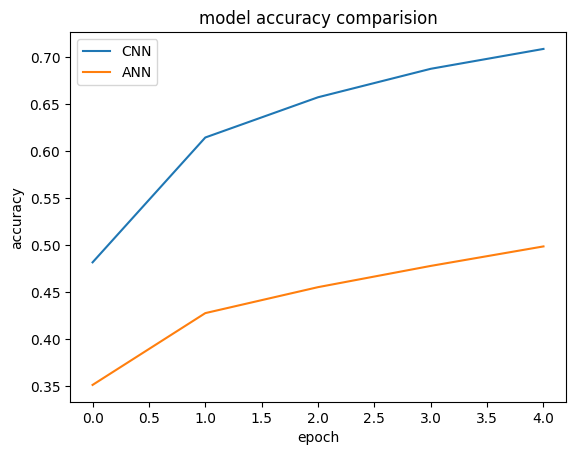

In [24]:
# summarize history for accuracy
plt.plot(cnn_history.history['accuracy'])
plt.plot(ann_history.history['accuracy'])
plt.title('model accuracy comparision')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['CNN', 'ANN'], loc='upper left')
plt.show()

### We can see clearly CNN outperforms ANN 

# Checking Precdiction with Respect to Labels

In [25]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 0, 4]

In [26]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

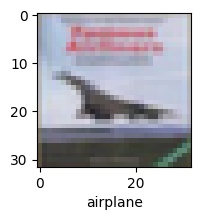

In [27]:
plot_sample(X_test, y_test,3)

In [28]:
classes[y_classes[3]]

'airplane'